# Projet LEYENDA
## Livrable 1 - Classification Binaire

In [2]:
#dir = './' Chemin pour le tree

In [3]:
print("bonjour")

bonjour


#### Importation des bibliothèques

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-10-03 10:01:40.698022: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-03 10:01:40.698081: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-03 10:01:40.698110: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-03 10:01:40.707647: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Préparation des images

In [5]:
from zipfile import ZipFile

#Liste des noms de fichier .zip
file = ["./Dataset Livrable 1 - Painting.zip",
        "/Dataset Livrable 1 - Photo.zip",
        "./Dataset Livrable 1 - Schematics.zip",
        "./Dataset Livrable 1 - Sketch.zip",
        "./Dataset Livrable 1 - Text.zip"]
for name in file:
    # ouvrir le fichier zip en mode lecture
    with ZipFile(name, 'r') as zip:
        # afficher tout le contenu du fichier zip
        zip.printdir()
        # extraire tous les fichiers
        print('extraction...')
        zip.extractall()
        print('Terminé!')

File Name                                             Modified             Size
Schematics/                                    2020-12-08 10:03:12            0
Schematics/desktop.ini                         2020-11-26 18:52:00        10230
Schematics/schematics_00001.jpg                2020-12-07 20:06:06       117641
Schematics/schematics_00002.jpg                2020-12-07 20:06:12          319
Schematics/schematics_00003.jpg                2020-12-07 16:26:42        48555
Schematics/schematics_00004.jpg                2020-12-07 20:05:42        22857
Schematics/schematics_00005.jpg                2020-12-08 09:46:58       102597
Schematics/schematics_00006.jpg                2020-12-07 20:07:12       123845
Schematics/schematics_00007.jpg                2020-12-08 09:08:16       131081
Schematics/schematics_00008.jpg                2020-12-08 09:32:34        13766
Schematics/schematics_00009.jpg                2020-12-07 17:13:32        11850
Schematics/schematics_00010.jpg         

In [13]:
datapath = "./Data/"
data_dir = pathlib.Path(datapath)

In [14]:
image_h = 180
image_w = 180
batch_s = 32

In [15]:
# Le train_set
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=  0.2,
    subset =  "training",
    seed=42,
    image_size=(image_h, image_w),
    batch_size=batch_s
)
# Le test_set
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=  0.2,
    subset =  "validation",
    seed=42,
    image_size=(image_h, image_w),
    batch_size=batch_s
)

Found 21406 files belonging to 3 classes.
Using 17125 files for training.
Found 21406 files belonging to 3 classes.
Using 4281 files for validation.


In [16]:
class_names = train_set.class_names
print(class_names)

['Schematics', 'Sketch', 'Text']


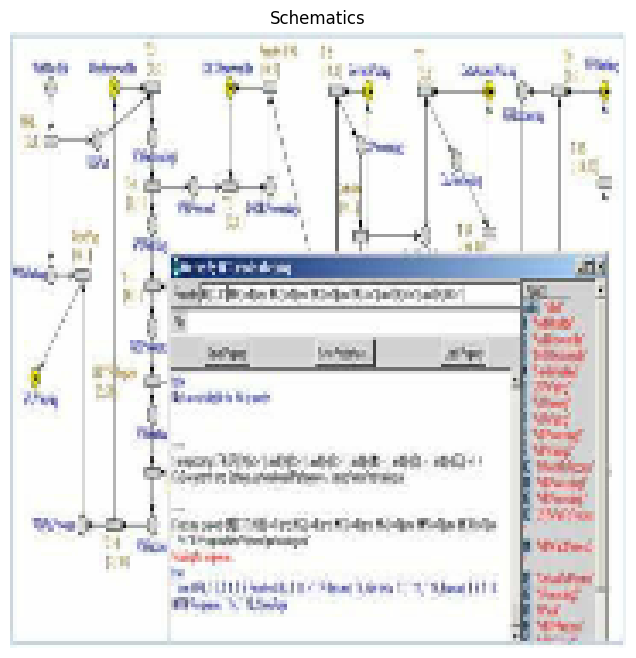

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):
    for i in range(9):
        ax =  plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
print(type(train_set))
images, labels =  next(iter(train_set))
print(images.shape)
print(labels.shape)

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


2023-10-03 10:22:46.120798: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23219253 exceeds 10% of free system memory.


(32, 180, 180, 3)
(32,)


2023-10-03 10:22:46.333767: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18461430 exceeds 10% of free system memory.


In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
num_classes = 5 # Nombre de classes et donc aussi nombre de neurones dans la dernière couche
model = Sequential()

In [21]:
model.add(layers.experimental.preprocessing.Rescaling(1./255))

In [22]:
# Couche de convolution
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
# Couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

In [23]:
# Bloc convolutif ou la taille du filtre est de (32, 3)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))

# Bloc convolutif ou la taille du filtre est de (64, 3)
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

# Applatissement de la couche
model.add(layers.Flatten())

# Couche entièrement connectée (couche dense)
model.add(layers.Dense(128, activation='relu'))

# Couche entièrement connectée retournant le résultat de la classification
model.add(layers.Dense(num_classes))

model.build((None, image_h, image_w, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 518400)            0         
                                                        

In [24]:
model.compile(optimizer =  'adam',
              loss =  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 518400)            0         
                                                        

In [27]:
from keras.src.layers.preprocessing.image_preprocessing import HORIZONTAL_AND_VERTICAL
from keras.src.layers.preprocessing.image_preprocessing import RandomFlip
from keras.src.layers.preprocessing.image_preprocessing import RandomRotation
from keras.src.layers.preprocessing.image_preprocessing import RandomZoom
from keras import Sequential

data_augmentation = Sequential(
    [
        RandomFlip(
            mode=HORIZONTAL_AND_VERTICAL,
            input_shape=(image_h, image_w, 3)),
        RandomRotation(
            factor=0.18,
            fill_mode='reflect',
            interpolation='bilinear',
            seed=None,
            fill_value=0.0),
        RandomZoom(
            height_factor=0.1,
            width_factor=None,
            fill_mode='reflect',
            interpolation='bilinear',
            seed=None,
            fill_value=0.0)
    ]
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

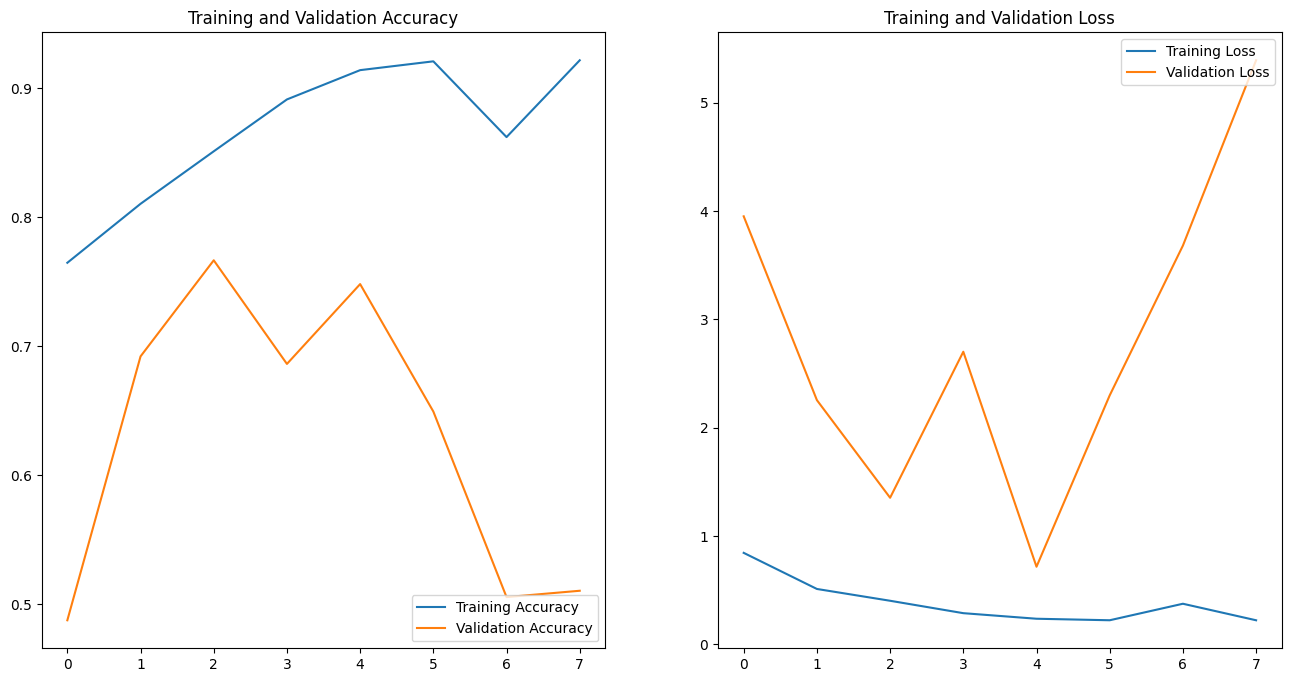

In [28]:
# Le modèle
epochs = 8
complete_model =  Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    data_augmentation,
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
complete_model.build((None, image_h, image_w, 3))
# Compilation du modèle
complete_model.compile(optimizer =  'adam',
                       loss =  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       metrics=['accuracy'])
# Résumé du modèle
complete_model.summary()
# Enrainement du modèle
history =  complete_model.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()